In [1]:
import os
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('paper', font_scale=1.1)
import pandas as pd
import warnings
import sys
import scipy.stats

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from create_data_byreliability import GetData as gd

In [13]:
DirectoryName = '/Users/seetha/Box Sync/MultiDayData/Data/'
CombinedFolderName = '/Users/seetha/Box Sync/MultiDayData/PlaceCellResultsAll/'
SaveFolder = '/Users/seetha/Box Sync/MultiDayData/NetworkAnalysis/'
SaveFigureFolder = '/Users/seetha/Box Sync/MultiDayData/MultiDayPaper/Figures/FigurepanelsPDF/NewNetworkFigs/'

## Task1_Task2

In [5]:
na = gd(DirectoryName, CombinedFolderName)

In [6]:
taskstocompare = 'Task2'
full_graph, by_location_highrel, by_animal_highrel, temp = na.get_adjacency_matrix(taskstocompare, basetask='Task1',
                                   reliability_type='High', subsample=False,
                                   SaveFolder=os.path.join(SaveFolder, 'Highreliability'))


NR34
Analysing..99 cells
CFC17
Analysing..145 cells
NR32
Analysing..67 cells
CFC16
Analysing..51 cells
CFC18
Analysing..171 cells


In [7]:
taskstocompare = 'Task2'
full_graph_lowrel, by_location_lowrel, by_animal_lowrel, temp = na.get_adjacency_matrix(taskstocompare, basetask='Task1',
                                   reliability_type='Low', subsample=False,
                                   SaveFolder=os.path.join(SaveFolder, 'Lowreliability'))

NR34
Analysing..193 cells
CFC17
Analysing..127 cells
NR32
Analysing..116 cells
CFC16
Analysing..425 cells
CFC18
Analysing..328 cells


In [ ]:
fs, ax = plt.subplots(1, 2)
na.plot_factors_bylocation(ax[0], by_location_highrel, by_location_lowrel, column_name='Degree')
na.plot_factors_bylocation(ax[1], by_location_highrel, by_location_lowrel, column_name='Clustering')
ax[0].set_ylim((0.07, 0.3))
ax[1].set_ylim((0.1, 0.4))
sns.despine(fs)
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bytrack_alllowrelcells_Task1.pdf'), bbox_inches='tight')

In [ ]:
by_location_highrel

In [ ]:
fs, ax = plt.subplots(1, 2)
na.plot_factors_by_animal(ax[0], by_animal_highrel, by_animal_lowrel, column_name='Degree')
na.plot_factors_by_animal(ax[1], by_animal_highrel, by_animal_lowrel, column_name='Clustering')
sns.despine(fs)
ax[0].set_ylim((0, 0.3))
ax[1].set_ylim((0, 0.4))
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_alllowrelcells_Task1.pdf'), bbox_inches='tight')

Norm_Degree
Location 1: t-statistic 11.000, p-values 0.000
Location 2: t-statistic 7.563, p-values 0.000
Location 3: t-statistic 5.219, p-values 0.000
Location 4: t-statistic 6.933, p-values 0.000
Location 5: t-statistic 10.467, p-values 0.000
Clustering
Location 1: t-statistic 16.262, p-values 0.000
Location 2: t-statistic 19.292, p-values 0.000
Location 3: t-statistic 18.643, p-values 0.000
Location 4: t-statistic 18.596, p-values 0.000
Location 5: t-statistic 21.575, p-values 0.000


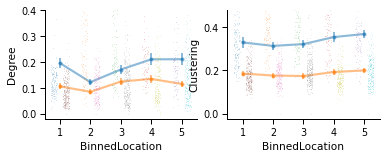

In [14]:
fs, ax = plt.subplots(1, 2)
for n, c in enumerate(['Degree', 'Clustering']):
    na.plot_factors_bylocation_fullgraph(ax[n], full_graph, full_graph_lowrel, c)
    na.stats_bylocation_fullgraph(full_graph, full_graph_lowrel, c)

sns.despine(fs)
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_alllowrelcells_Task1.pdf'), bbox_inches='tight')

## Task3_Task4

In [8]:
taskstocompare = 'Task4'
full_graph_highrel_task3, by_location_highrel_task3, by_animal_highrel_task3, temp = na.get_adjacency_matrix(taskstocompare, basetask='Task3',
                                   reliability_type='High', subsample=False,
                                   SaveFolder=os.path.join(SaveFolder, 'Highreliability'))

NR34
Analysing..59 cells
CFC17
Analysing..79 cells
NR32
Analysing..18 cells
CFC16
Analysing..12 cells
CFC18
Analysing..101 cells


In [9]:
taskstocompare = 'Task4'
full_graph_lowrel_task3, by_location_lowrel_task3, by_animal_lowrel_task3, temp = na.get_adjacency_matrix(taskstocompare, basetask='Task3',
                                   reliability_type='Low', subsample=False,
                                   SaveFolder=os.path.join(SaveFolder, 'Lowreliability'))

NR34
Analysing..522 cells
CFC17
Analysing..207 cells
NR32
Analysing..253 cells
CFC16
Analysing..511 cells
CFC18
Analysing..593 cells


Norm_Degree
Location 1: t-statistic 26.651, p-values 0.000
Location 2: t-statistic 9.145, p-values 0.000
Location 3: t-statistic 9.998, p-values 0.000
Location 4: t-statistic 7.886, p-values 0.000
Location 5: t-statistic 13.461, p-values 0.000
Clustering
Location 1: t-statistic 11.356, p-values 0.000
Location 2: t-statistic 25.465, p-values 0.000
Location 3: t-statistic 25.664, p-values 0.000
Location 4: t-statistic 23.673, p-values 0.000
Location 5: t-statistic 20.418, p-values 0.000


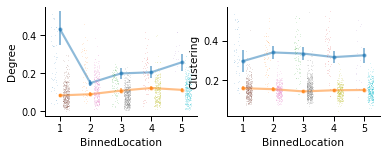

In [15]:
fs, ax = plt.subplots(1, 2)
for n, c in enumerate(['Degree', 'Clustering']):
    na.plot_factors_bylocation_fullgraph(ax[n], full_graph_highrel_task3, full_graph_lowrel_task3, c)
    na.stats_bylocation_fullgraph(full_graph_highrel_task3, full_graph_lowrel_task3, c)

sns.despine(fs)
fs.set_size_inches((6, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_alllowrelcells_Task3.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(1, 2)
na.plot_factors_bylocation(ax[0], by_location_highrel_task3, by_location_lowrel_task3, column_name='Degree')
na.plot_factors_bylocation(ax[1], by_location_highrel_task3, by_location_lowrel_task3, column_name='Clustering')
sns.despine(fs)
ax[0].set_ylim((0.07, 0.45))
ax[1].set_ylim((0.1, 0.4))
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_bytrack_alllowrelcells_Task3.pdf'), bbox_inches='tight')

In [ ]:
fs, ax = plt.subplots(1, 2)
na.plot_factors_by_animal(ax[0], by_animal_highrel_task3, by_animal_lowrel_task3, column_name='Degree')
na.plot_factors_by_animal(ax[1], by_animal_highrel_task3, by_animal_lowrel_task3, column_name='Clustering')
sns.despine(fs)
ax[0].set_ylim((0, 0.35))
ax[1].set_ylim((0, 0.45))
fs.set_size_inches((3, 2))
fs.savefig(os.path.join(SaveFigureFolder, 'Deg_CC_byanimal_alllowrelcells_Task3.pdf'), bbox_inches='tight')